In [70]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [15]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [16]:
train=data.sample(frac=0.8,random_state=200)
val=data.drop(train.index)

In [19]:
## Remove the repetitive features because they can cause problems in the fitting of gradient descent
train = train.drop(['GarageArea', 'GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd'], axis = 1)

In [21]:
#Create new features, more logical features.
train['Age'] = max(train['YearBuilt']) - train['YearBuilt']

In [26]:
train['BsmtFinSF'] = train['BsmtFinSF1'] + train['BsmtFinSF2']
train['TotArea'] = train['BsmtFinSF'] + train['BsmtUnfSF'] + train['1stFlrSF'] + train['2ndFlrSF'] + train['GrLivArea']

In [42]:
# Manually fit the order of some features to make a straight line with the target value
train['Age'] = train['Age']**0.5
train['AgeMod']  = train['AgeMod']**0.5

In [22]:
train['AgeMod'] = max(train['YearRemodAdd']) - train['YearRemodAdd']

In [24]:
train = train.drop(['YearRemodAdd', 'YearBuilt'], axis = 1)

In [31]:
train = train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'MoSold', 'YrSold', 'MiscVal'], axis=1)

In [165]:
# drop irrelevant categorical features
train = train.drop(['PoolQC'], axis = 1)

In [96]:
fill_missing('LotFrontage', mode(train['LotFrontage'])[0][0])
fill_missing('MasVnrArea', mode(train['MasVnrArea'])[0][0])

In [117]:
train['PoolQC'] = train['PoolQC'].replace(to_replace = ['Ex', 'Fa', 'Gd'], value = [2,3,1])
train['PoolQC'] = train['PoolQC'].fillna(0)

In [121]:
train['MiscFeature'] = train['MiscFeature'].fillna('Na')

In [124]:
train['Alley'] = train['Alley'].fillna('Na')

In [127]:
train['Fence'] = train['Fence'].fillna('Na')

In [131]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('Na')

In [137]:
train['FireplaceQu'] = train['FireplaceQu'].replace(to_replace = ['Ex', 'Gd', 'TA','Fa', 'Po', 'Na' ], value = [5,4,3,2,1,0])

In [143]:
train['GarageCond'] = train['GarageCond'].fillna('Na')

In [146]:
train['GarageFinish'] = train['GarageFinish'].fillna('Na')

In [152]:
for col in ['GarageQual', 'GarageCond']:
    train[col] = train[col].replace(to_replace = ['Ex', 'Gd', 'TA','Fa', 'Po', 'Na' ], value = [5,4,3,2,1,0])

In [148]:
train['GarageFinish'] = train['GarageFinish'].replace(to_replace = ['Na', 'Unf', 'RFn', 'Fin'], value = [0,1,2,3])

In [153]:
train['GarageType'] = train['GarageType'].fillna('Na')

In [156]:
train['BsmtExposure'] = train['BsmtExposure'].fillna('Na')

In [158]:
train['BsmtExposure'] = train['BsmtExposure'].replace(to_replace = ['Na', 'No', 'Mn', 'Av'], value = [0,1,2,3])

In [162]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Na')

In [166]:
train['BsmtFinType2'] = train['BsmtFinType2'].replace(to_replace= ['ALQ', 'GLQ', 'BLQ', 'LwQ', 'Rec', 'Unf', 'Na'], value = [1,1,1,1,1,1,0])

In [168]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('Na')

In [173]:
train['BsmtQual'] = train['BsmtQual'].fillna('Na')
train['BsmtCond'] = train['BsmtCond'].fillna('Na')

In [176]:
for col in ['BsmtQual', 'BsmtCond']:
    train[col] = train[col].replace(to_replace = ['Ex', 'Gd', 'TA','Fa', 'Po', 'Na' ], value = [5,4,3,2,1,0])

In [179]:
train['MasVnrType'] = train['MasVnrType'].fillna('Na')

In [183]:
train = train.fillna(train['Electrical'].value_counts().index[0])

In [253]:
grouping = grouping('Neighborhood', train, 10000)
val['Neighborhood']  = assign_grouping('Neighborhood', val, grouping)
test['Neighborhood'] = assign_grouping('Neighborhood', test, grouping)

In [240]:
train = train.drop(['Condition2'],axis=1)

In [258]:
train = train.drop(['RoofMatl'],axis=1)

In [261]:
train = train.drop(['BldgType'],axis=1)

In [ ]:
train = train.drop(['LotShape', 'Utilities'],axis=1)

In [304]:
groups = grouping('Exterior1st', train, 50000)
assign_grouping('Exterior1st', val, groups)
assign_grouping('Exterior1st', test, groups)

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
5       HdBoard
6       HdBoard
7       VinylSd
8       HdBoard
9       VinylSd
10      MetalSd
11      HdBoard
12      HdBoard
13      VinylSd
14      VinylSd
15      VinylSd
16      VinylSd
17      VinylSd
18      CemntBd
19      VinylSd
20      VinylSd
21      VinylSd
22      VinylSd
23      VinylSd
24      VinylSd
25      VinylSd
26      VinylSd
27      VinylSd
28      VinylSd
29      VinylSd
         ...   
1429    MetalSd
1430    MetalSd
1431    Wd Sdng
1432    BrkFace
1433    MetalSd
1434    CemntBd
1435    CemntBd
1436    VinylSd
1437    VinylSd
1438    VinylSd
1439    VinylSd
1440    VinylSd
1441    VinylSd
1442    VinylSd
1443    VinylSd
1444    Wd Sdng
1445    MetalSd
1446    CemntBd
1447    VinylSd
1448    VinylSd
1449    CemntBd
1450    CemntBd
1451    VinylSd
1452    CemntBd
1453    CemntBd
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    HdBoard
1458    HdBoard
Name: Exterior1st, Lengt

In [308]:
groups = grouping('Exterior2nd', train, 10000)
assign_grouping('Exterior2nd', val, groups)
assign_grouping('Exterior2nd', test, groups)

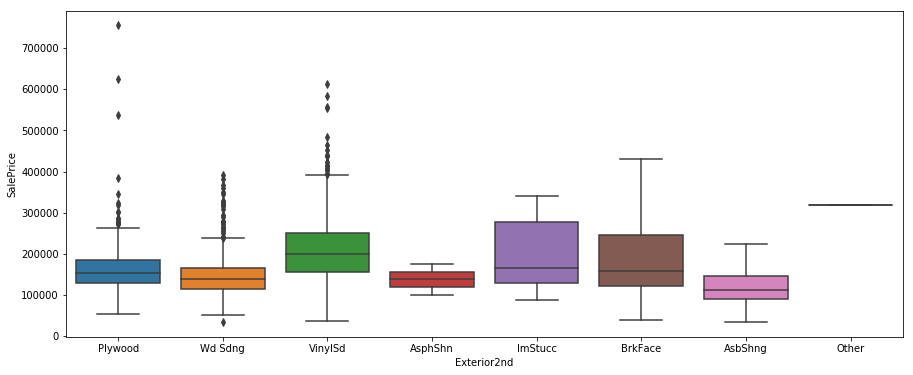

In [309]:
colx = 'Exterior2nd'
# print(train.groupby(colx).count()[['Id']]/1460)
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=colx, y="SalePrice", ax=ax, data=train);

In [262]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'N1'],
      dtype='object')

In [303]:
from numpy import mean, std

def grouping(col, data, m):
    unique = data[col].unique()
    pairs = dict()
    for thing in unique:
        means = mean(train[train[col] == thing]['SalePrice'])
        stds = std(train[train[col] == thing]['SalePrice'])
        pairs.update({thing: (means, stds)})
    grouping = dict()
    for key1 in pairs.keys():
        for key2 in pairs.keys():
            if pairs[key1][0] < pairs[key2][0] + m and pairs[key1][0] > pairs[key2][0] - m and key1 != key2:
                data[col] = data[col].replace(to_replace = [key1], value = [key2])
                grouping.update({key1: key2})
        
    return grouping

In [307]:
def assign_grouping(col, data, group):
    for x in data[col]:
        for key, value in group.items():
            if x in value:
                data[col] = data[col].replace(to_replace = [x], value = [key])

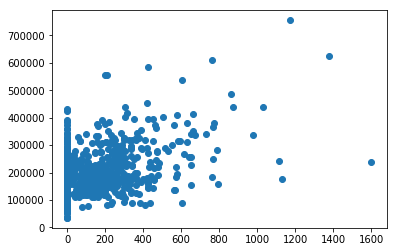

In [85]:
plt.scatter(train['MasVnrArea'], train['SalePrice'])

In [185]:
#missing data
total = train[train.select_dtypes(include=['object']).columns].isnull().sum().sort_values(ascending=False)
percent = (train[train.select_dtypes(include=['object']).columns].isnull().sum()/train[train.select_dtypes(include=['object']).columns].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Ratio'])
missing_data.head(20)

,Total,Ratio
SaleCondition,0,0.0
Neighborhood,0,0.0
RoofMatl,0,0.0
RoofStyle,0,0.0
HouseStyle,0,0.0
BldgType,0,0.0
Condition2,0,0.0
Condition1,0,0.0
LandSlope,0,0.0
Exterior2nd,0,0.0


In [170]:
train.select_dtypes(exclude=['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

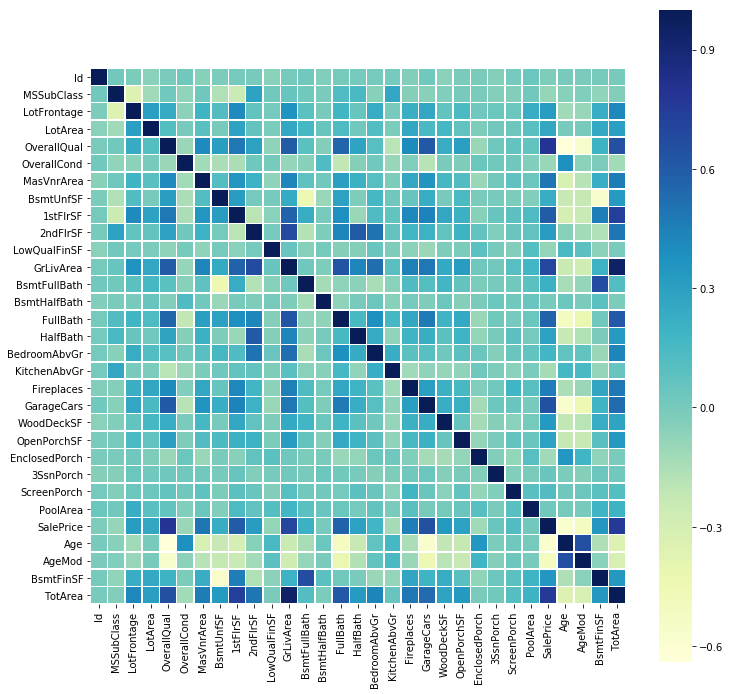

In [88]:
#correlation matrix
corrmat = train[train.select_dtypes(exclude=['object']).columns].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, square=True, cmap="YlGnBu", linewidths=.5, annot=False);

GarageYrBlt and YearBlt are highly correlated with each other.
GarageYrBlt and YrRemodAdd are highly correlated
GarageCars and GarageArea are highly correlated.
GrLivArea and TotRmsAbvGrd are highly correlated.
BsmtFullBath and BsmtFinSF1 are highly correlated.
TotalBsmtSF and 1stFlrSF are highly correlated.
2ndFlrSF and TotRmsAbvGrd are highly correlated.

SalePrice is highly correlated with OverallQual, GrLivArea, GarageCars, TotalBsmtSF, YearBuilt, FullBath

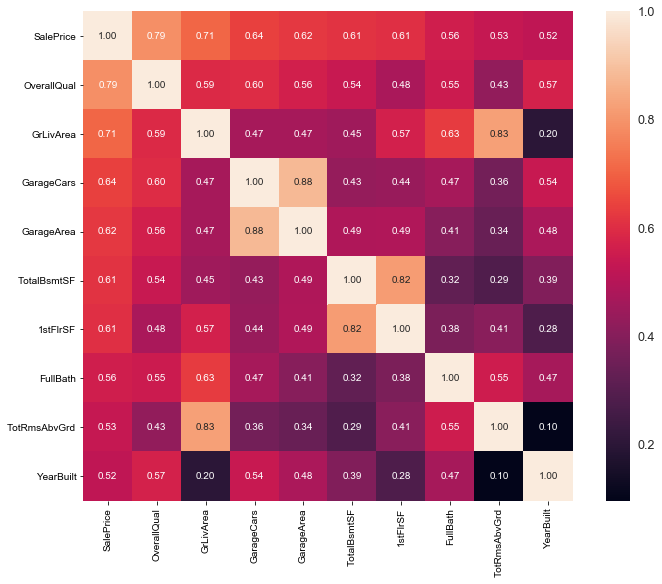

In [9]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(12, 9))
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#scatterplot
sns.set()
cols = ['ExterQual', 'HeatingQC', 'OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt',\
        'BsmtQual','SalePrice', 'log_price']
sns.pairplot(train[cols], size = 2.5)
plt.show();

Now, the turn of missing variables..

In [95]:
len(train)

1168

In [17]:
#missing data
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.loc[:, 'dtype'] = test[(missing_data_test.index)].dtypes
missing_data_test.head(34)

,Total,Percent,dtype
PoolQC,1456,0.997944,object
MiscFeature,1408,0.965045,object
Alley,1352,0.926662,object
Fence,1169,0.801234,object
FireplaceQu,730,0.500343,object
LotFrontage,227,0.155586,float64
GarageCond,78,0.053461,object
GarageQual,78,0.053461,object
GarageYrBlt,78,0.053461,float64
GarageFinish,78,0.053461,object


In [ ]:
test= test.sort_values(by='ExterQual')
test.loc[:, 'KitchenQual'] = test['KitchenQual'].fillna(method = 'bfill')
test= test.sort_values(by='Id')

In [ ]:
test.loc[(test[test['MSZoning'].isnull()]).index]

In [77]:
def rmse(y_pred, y):
    return np.sqrt(np.mean(np.square(y_pred-y)))
def rmsle(y_pred, y):
    return np.sqrt(np.mean(np.square(np.log(y_pred+1) - np.log(y+1))))

def fill_missing(colx, value):
    train.loc[:, colx] = train.loc[:, colx].fillna(value)
    test.loc[:, colx] = test.loc[:, colx].fillna(value)
    test.loc[:, colx] = val.loc[:, colx].fillna(value)

In [280]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = pd.concat((train, test))
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

train = train.drop((missing_data[missing_data['Percent']>0.15]).index,1)
test=test.drop((missing_data[missing_data['Percent']>0.15]).index,1)

for col in train.select_dtypes(exclude = ['object']):
    if train[col].isnull().sum() > 0:
        train.loc[:, col] = train.loc[:, col].fillna(train[col].mean().astype(int))

for col in test.select_dtypes(exclude = ['object']):
    if test[col].isnull().sum() > 0:
        test.loc[:, col] = test.loc[:, col].fillna(test[col].mean().astype(int))
# Thus the numerical columns have been fixed.

for col in train.select_dtypes(include = ['object']):
    if train[col].isnull().sum() > 0:
        train.loc[:, col] = train.loc[:, col].fillna(train[col].mode()[0])

for col in test.select_dtypes(include = ['object']):
    if test[col].isnull().sum() > 0:
        test.loc[:, col] = test.loc[:, col].fillna(test[col].mode()[0])
# Now there is no missing data

train = pd.get_dummies(train)
test = pd.get_dummies(test)

drop = list(set(train) - set(test))
drop.remove('SalePrice')
train = train.drop(drop, axis = 1, inplace = False)
# Now train and test both have the same dummy variables

# Time for PCA
features = list(train)
features.remove('SalePrice')
features.remove('Id')

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train[features])
X_test = sc.transform(test[features])

# # # Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

In [282]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import GradientBoostingRegressor
alpha = 0.95
# regressor = GradientBoostingRegressor(loss='ls', alpha=alpha,
#                                 n_estimators=250, max_depth=100,
#                                 learning_rate=.01, min_samples_leaf=5,
#                                 min_samples_split=2)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
keep = list(set(list(train)) - set(['Id',  'SalePrice']))

y = train['SalePrice'] 

# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor.fit(X_train, y)

y_pred = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# y_pred = np.exp(y_pred) -1
# y_pred_test = np.exp(y_pred_test) -1
# y = np.exp(y) -1

submission = pd.DataFrame( y_pred_test, columns = [ 'SalePrice'])
submission.loc[:, 'Id'] = test['Id']
submission = submission[['Id', 'SalePrice']]
submission.to_csv('submission.csv', index=False)
print(regressor.n_features_)

253


In [283]:
train.loc[:, 'PredPrice'] = y_pred
train = train.sort_values(by = 'SalePrice')

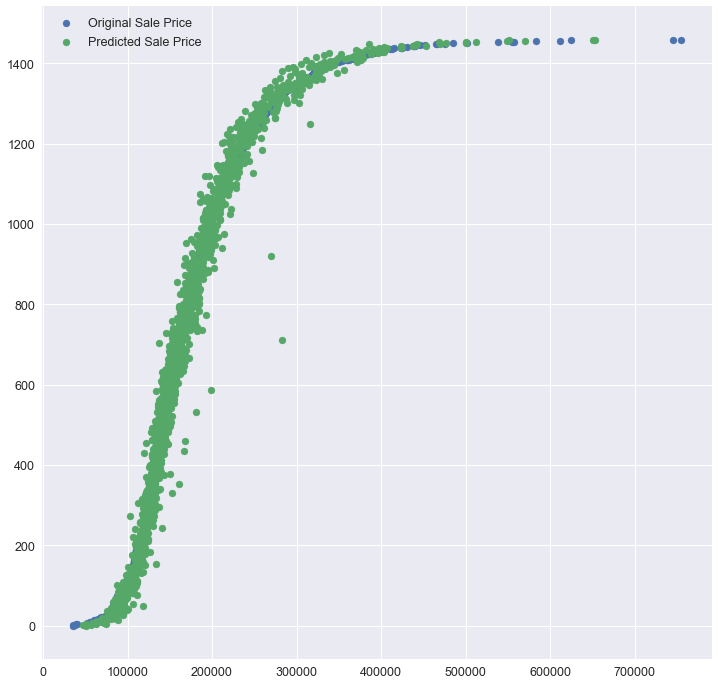

In [285]:
f, ax = plt.subplots(figsize=(12, 12))
plt.scatter(train['SalePrice'], range(1460), label = 'Original Sale Price')
plt.scatter(train['PredPrice'], range(1460), label = 'Predicted Sale Price')
plt.legend(loc=0)
plt.show()

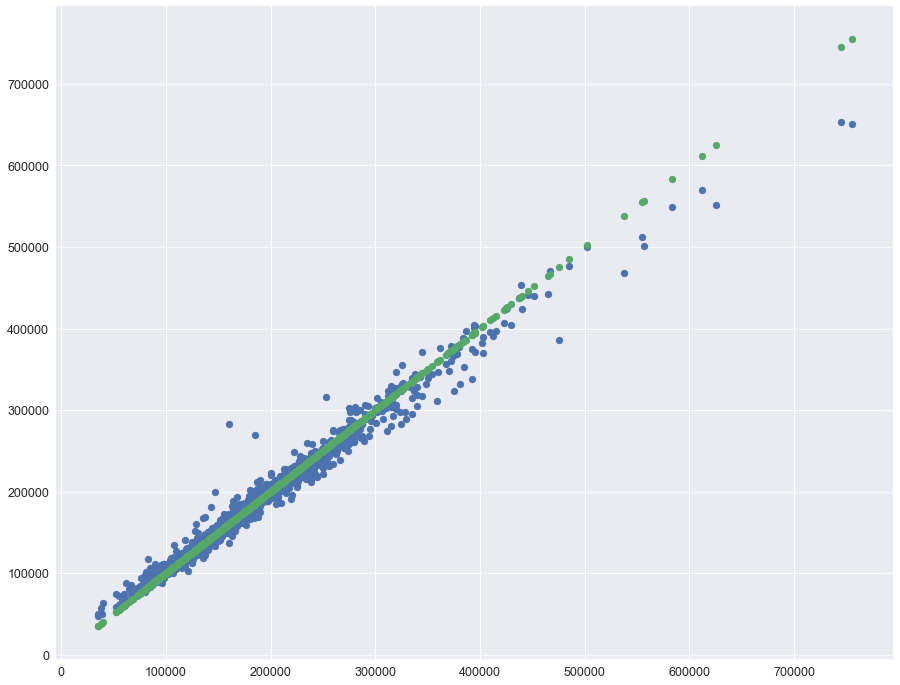

In [286]:
f, ax = plt.subplots(figsize=(15, 12))
plt.scatter(y, y_pred)
plt.scatter(y,y )

In [212]:
from scipy.stats import skew
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#log transform skewed numeric features:
# numeric_feats = list(train.select_dtypes(exclude=['object']).columns)

# skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index
# skewed_feats = list(skewed_feats)

# train.loc[:, skewed_feats] = np.log1p(train[skewed_feats])
# test.loc[:, list(set(skewed_feats) - set(['SalePrice']))] = np.log1p(test[list(set(skewed_feats) - set(['SalePrice']))])

# dropping the highly missing features from train and test sets
train.drop(['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'LotFrontage'],axis=1, inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'LotFrontage'],axis=1, inplace=True)

# replace the Bsmt qual values with integers
train[['GarageQual', 'GarageCond']].fillna('missing')
test[['GarageQual', 'GarageCond']].fillna('missing')
import math
for coly in ['GarageQual', 'GarageCond']:
    train.loc[:, coly+'_num'] = train[coly].replace(to_replace = ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])
    test.loc[:, coly+'_num'] = test[coly].replace(to_replace = ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])

fill_missing('BsmtQual', 0)

for coly in ['BsmtQual']:
    train.loc[:, coly] = train[coly].replace(to_replace = ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])
    test.loc[:, coly] = test[coly].replace(to_replace=  ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])
fill_missing('Electrical', 'SBrkr')

# train.loc[:, 'log_price'] = np.log(train['SalePrice'])

#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

train = train.drop((missing_data[missing_data['Total']>0]).index,1)
test=test.drop((missing_data[missing_data['Total']>0]).index,1)

fill_missing(['GarageCars', 'TotalBsmtSF', 'GarageArea'], 0)
train = train.drop(['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFinSF2'],1)
test = test.drop(['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFinSF2'],1)

train.loc[:, 'LotShape'] = train['LotShape'].replace(to_replace = ['IR2', 'IR3'], value=['IR1', 'IR1'])
test.loc[:, 'LotShape'] = test['LotShape'].replace(to_replace = ['IR2', 'IR3'], value=['IR1', 'IR1'])

train.loc[:, 'HouseStyle'] = train['HouseStyle'].replace(to_replace = ['2.5Unf', 'SFoyer', 'SLvl'], value=['other', 'other', 'other'])
test.loc[:, 'HouseStyle'] = test['HouseStyle'].replace(to_replace = ['2.5Unf', 'SFoyer', 'SLvl'], value=['other', 'other', 'other'])

train.loc[:, 'RoofStyle'] = train['RoofStyle'].replace(to_replace = ['Gambrel', 'Mansard', 'Flat', 'Shed'], value=['other', 'other', 'other', 'other'])
test.loc[:, 'RoofStyle'] = test['RoofStyle'].replace(to_replace = ['Gambrel', 'Mansard', 'Flat', 'Shed'], value=['other', 'other', 'other', 'other'])

coly = 'Foundation'
train.loc[:, coly] = train[coly].replace(to_replace = ['Wood', 'Slab', 'Stone'],\
                                                      value = ['other', 'other', 'other'])
test.loc[:, coly] = test[coly].replace(to_replace=  ['Wood', 'Slab', 'Stone'],\
                                                    value = ['other', 'other', 'other'])

coly = 'PavedDrive'
train.loc[:, coly] = train[coly].replace(to_replace = ['N', 'P', 'Y'],\
                                                      value = [1,2,3])
test.loc[:, coly] = test[coly].replace(to_replace= ['N', 'P', 'Y'],\
                                                    value = [1,2,3])

coly = 'SaleType'
train.loc[:, coly] = train[coly].replace(to_replace = ['New', 'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth', 'WD'],\
                                                      value = [1,0,0,0,0,0,0,0,0])
test.loc[:, coly] = test[coly].replace(to_replace= ['New', 'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth', 'WD'],\
                                                    value = [1,0,0,0,0,0,0,0,0])
for coly in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual' ]:
    train.loc[:, coly] = train[coly].replace(to_replace = ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])
    test.loc[:, coly] = test[coly].replace(to_replace=  ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])

keep = ['Id', 'LotShape', 'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', 'PavedDrive', \
        'HeatingQC', 'KitchenQual', 'SaleType', 'Foundation', 'OverallQual', \
        'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'BsmtQual',\
        'SalePrice']
# keep = set(train) - set(['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'LotFrontage', ])

train = train[keep]
test = test[list(set(keep) -  set(['SalePrice']))]

test= test.sort_values(by='ExterQual')
test.loc[:, 'KitchenQual'] = test['KitchenQual'].fillna(method = 'bfill')
test= test.sort_values(by='Id')

test.loc[:,'SaleType'] = test['SaleType'].fillna(0) #randomly chosen

train = pd.get_dummies(train)
test = pd.get_dummies(test)

#deleting one column to avoid falling into dummy variable trap
del train['HouseStyle_2.5Fin']
del train['Foundation_BrkTil']
del test['Foundation_BrkTil']

# del train['RoofStyle_other']
# del test['RoofStyle_other']

# del train['HouseStyle_other']
# del test['HouseStyle_other']

# del train['LotShape_IR1']
# del test['LotShape_IR1']

# train.sort_values(by = 'GrLivArea', ascending = False)[:2]
# train = train.drop(train[train['Id'] == 1298].index)
# train = train.drop(train[train['Id'] == 523].index)
# train.sort_values(by = 'Id', ascending = True)

train.loc[train['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(train[ 'TotalBsmtSF'])
train.loc[train['GrLivArea']>0,'GrLivArea'] = np.log(train[ 'GrLivArea'])
test.loc[test['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(test[ 'TotalBsmtSF'])
test.loc[test['GrLivArea']>0,'GrLivArea'] = np.log(test[ 'GrLivArea'])

# # Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in log


In [287]:
rmsle(y_pred, y)

0.063269860134068226

In [24]:
rmsle(y_pred_test, y_test)

0.19509570343892496

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

keep = list(set(list(train)) - set(['Id', 'log_price', 'SalePrice']))
X = train[keep]
y = train['log_price'] 

#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_train))

y_pred_test = lin_reg_2.predict(poly_reg.fit_transform(X_test))

y_pred = np.exp(y_pred)
y_pred_test = np.exp(y_pred_test)
y = np.exp(y)
rmsle(y_pred, y)

submission = pd.DataFrame( y_pred_test, columns = [ 'SalePrice'])
submission.loc[:, 'Id'] = test['Id']
submission = submission[['Id', 'SalePrice']]
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.SalePrice.values.max()

In [ ]:
test = pd.get_dummies(test)

In [ ]:
train.select_dtypes(include=['object']).columns

In [ ]:
(missing_data_test[missing_data_test['Total']>0]).index

In [ ]:
drop = ['GarageQual_num', 'GarageCond_num', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageFinish','GarageType','BsmtExposure,'\
       'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtCond_num', 'BsmtQual_num', 'MasVnrType', ]

In [ ]:
train.loc[:, 'log_price'] = np.log(train['SalePrice'])

In [ ]:

# plt.scatter(train['BsmtQual_num'], train['BsmtCond_num']);

In [ ]:
for coly in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual' ]:
    train.loc[:, coly] = train[coly].replace(to_replace = ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])
    test.loc[:, coly] = test[coly].replace(to_replace=  ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],\
                                                          value = [0,1,2,3,4,5])

In [ ]:
coly = 'SaleType'
train.loc[:, coly] = train[coly].replace(to_replace = ['New', 'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth', 'Wd'],\
                                                      value = [1,0,0,0,0,0,0,0,0])
test.loc[:, coly] = test[coly].replace(to_replace= ['New', 'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Oth', 'Wd'],\
                                                    value = [1,0,0,0,0,0,0,0,0])

In [ ]:
keep = ['Id', 'log_price', 'SalePrice', 'LotShape', 'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', \
        'HeatingQC', 'KitchenQual', 'PavedDrive', 'SaleType', 'Foundation', 'OverallQual', \
        'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'BsmtQual']

In [ ]:
train = train[keep]
test = test[list(set(keep) -  set(['log_price', 'SalePrice']))]